In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def lista_vizinhos(nmax):
    listav=-np.ones((nmax**2,4)) #indices dos vizinhos de cada estado 
                                 #comeca a -1 para nao confundir com o de indice 0
    nv=np.zeros(nmax**2) #numero de vizinhos de cada estado

    for i in range(nmax**2):
        nx= i % nmax
        ny= i // nmax
        # vizinho 1
        nx1=nx+1
        ny1=ny 
        if nx1 < nmax:
            iv = nx1+nmax*ny1
            listav[i,int(nv[i])]=iv
            nv[i]+=1
        # vizinho 2
        nx1=nx
        ny1=ny+1 
        if ny1 < nmax:
            iv = nx1+nmax*ny1
            listav[i,int(nv[i])]=iv
            nv[i]+=1
        # vizinho 3
        nx1=nx-1
        ny1=ny 
        if nx1 >= 0:
            iv = nx1+nmax*ny1
            listav[i,int(nv[i])]=iv
            nv[i]+=1
        # vizinho 4
        nx1=nx
        ny1=ny-1
        if ny1 >= 0:
            iv = nx1+nmax*ny1
            listav[i,int(nv[i])]=iv
            nv[i]+=1

    return (listav,nv)


In [3]:
def metropolis(T,nequi,nmedidas,N,nmax):

    #(1)
    nk=np.zeros(nmax**2)
    nk[0]=N     # todas no 1o estado
    E=2*N
    estado_particula=np.ones(nmax**2)

    #(2)
    Emedio=0
    E2medio=0
    nkmed=np.zeros(nmax**2)

    lista_viz,nvs = lista_vizinhos(nmax)
    npassos=nequi+nmedidas
    for t in range(npassos):
        for act in range(N):
            # escolher uma particula
            ip = np.random.randint(N)
            ik = int(estado_particula[ip])
            # escolha do vizinho
            iv = np.random.randint(nvs[ik])
            ikv = int(lista_viz[ik,iv])
            #calculo da variacao da energia
            nx= ik % nmax
            ny= ik // nmax
            nxv= ikv % nmax
            nyv= ikv // nmax
            dE = (nxv**2+nyv**2) - (nx**2+ny**2)
            pA=np.minimum(1,nvs[ik]*(nk[ikv]+1)/(nvs[ikv]*nk[ik])*np.exp(-dE/T)) ## preciso alterar com +2 e +1 nos nks???
            if np.random.rand() <=pA:
                E += dE
                nk[ik] -= 1
                nk[ikv] += 1
            

        if t>nequi:
            Emedio +=E
            E2medio +=E**2
            nkmed += nk
    Emedio /= nmedidas
    E2medio /= nmedidas
    nkmed /= nmedidas


    return (Emedio,E2medio,nkmed)

Simulação 1 T 3.0
<ipython-input-3-0d2639706e76>:30: RuntimeWarning: divide by zero encountered in double_scalars
  pA=np.minimum(1,nvs[ik]*(nk[ikv]+1)/(nvs[ikv]*nk[ik])*np.exp(-dE/T)) ## preciso alterar com +2 e +1 nos nks???
Simulação 2 T 13.241379310344827
Simulação 3 T 23.482758620689655
Simulação 4 T 33.724137931034484
Simulação 5 T 43.96551724137931
Simulação 6 T 54.206896551724135
Simulação 7 T 64.44827586206897
Simulação 8 T 74.6896551724138
Simulação 9 T 84.93103448275862
Simulação 10 T 95.17241379310344
Simulação 11 T 105.41379310344827
Simulação 12 T 115.6551724137931
Simulação 13 T 125.89655172413794
Simulação 14 T 136.13793103448276
Simulação 15 T 146.3793103448276
Simulação 16 T 156.6206896551724
Simulação 17 T 166.86206896551724
Simulação 18 T 177.10344827586206
Simulação 19 T 187.3448275862069
Simulação 20 T 197.58620689655172
Simulação 21 T 207.82758620689654
Simulação 22 T 218.06896551724137
Simulação 23 T 228.3103448275862
Simulação 24 T 238.55172413793102
Simulação 

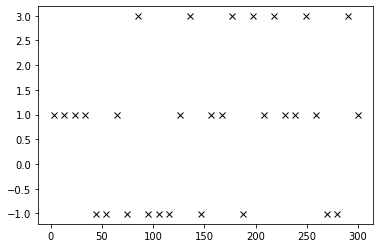

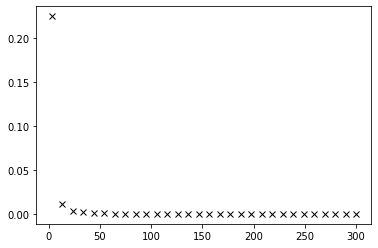

In [4]:
nmax=50
N=100
nmedidas=20000
nequi=5000

nTs=30 #30
Ts= np.linspace(3,300,nTs)
Emeds=np.zeros(nTs)
E2meds=np.zeros(nTs)
Cv=np.zeros(nTs)
nkmed=np.zeros(nmax**2)

for i in range(nTs):
    print("Simulação",i+1,"T",Ts[i])
    Emeds[i],E2meds[i],nkmed = metropolis(Ts[i],nequi,nmedidas,N,nmax)
    Cv[i]=(E2meds[i]-Emeds[i]**2)/(Ts[i]**2)
    Emeds[i] -=2*N
    # print(Emeds[i],E2meds[i],Cv[i])
    # # plt.figure(1)
    # # plt.pcolormesh([Ts[:i],nkmed])
    # plt.figure(2)
    # plt.plot(Ts[:i],Emeds[:i],'kx')
    # plt.figure(3)
    # plt.plot(Ts[:i],Cv[:i],'kx')
    # plt.show()

# plt.figure(1)
# plt.pcolormesh([Ts[:i],nkmed])
plt.figure(2)
plt.plot(Ts,Emeds,'kx')
plt.figure(3)
plt.plot(Ts,Cv,'kx')
plt.show()

